# 节点密度的零水平集

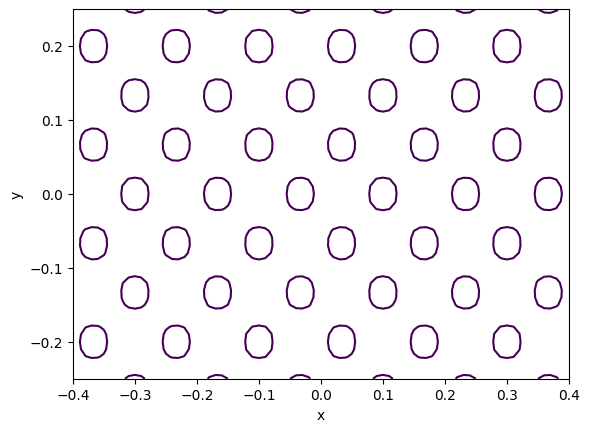

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fealpy.mesh import TriangleMesh

nx = 80
ny = 50
domain = [-0.5*nx/100, 0.5*nx/100, -0.5*ny/100, 0.5*ny/100]
mesh = TriangleMesh.from_box(box=domain, nx=nx, ny=ny)
node = mesh.entity('node')

dN = np.sin(6*np.pi*2*node[:, 0]/(domain[1]-domain[0])) * np.cos(6*np.pi*2*node[:, 1]/(domain[1]-domain[0])) + 0.5
xn = node[:, 0].reshape(nx+1, ny+1).T
yn = node[:, 1].reshape(nx+1, ny+1).T
dN = dN.reshape(nx+1, ny+1).T.round(4)

contour = plt.contour(xn, yn, dN, levels=[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

零水平集的等高线数据

zero_level_set: 54
zero level set 0- (5, 2):
 [[-0.31606343 -0.25      ]
 [-0.31       -0.24633493]
 [-0.3        -0.24479779]
 [-0.29       -0.24633493]
 [-0.28393657 -0.25      ]]
zero level set 1- (6, 2):
 [[-0.18287137 -0.25      ]
 [-0.18       -0.24776156]
 [-0.17       -0.24495422]
 [-0.16       -0.24544374]
 [-0.15       -0.25      ]
 [-0.15       -0.25      ]]
zero level set 2- (6, 2):
 [[-0.05       -0.25      ]
 [-0.05       -0.25      ]
 [-0.04       -0.24544374]
 [-0.03       -0.24495422]
 [-0.02       -0.24776156]
 [-0.01712863 -0.25      ]]
zero level set 3- (5, 2):
 [[ 0.08393657 -0.25      ]
 [ 0.09       -0.24633493]
 [ 0.1        -0.24479779]
 [ 0.11       -0.24633493]
 [ 0.11606343 -0.25      ]]
zero level set 4- (6, 2):
 [[ 0.21712863 -0.25      ]
 [ 0.22       -0.24776156]
 [ 0.23       -0.24495422]
 [ 0.24       -0.24544374]
 [ 0.25       -0.25      ]
 [ 0.25       -0.25      ]]
zero level set 5- (6, 2):
 [[ 0.35       -0.25      ]
 [ 0.35       -0.25      ]
 [ 0

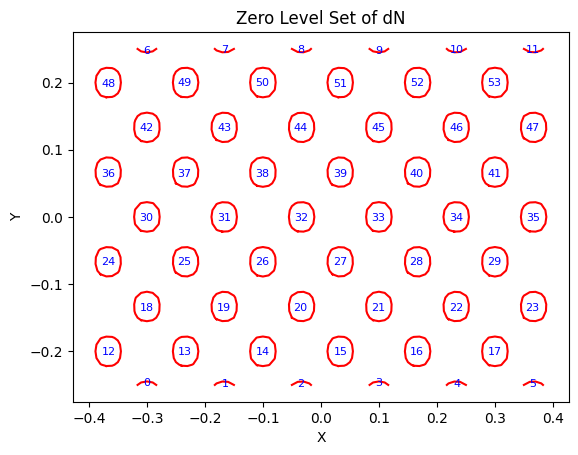

In [2]:
# 获取等高线数据
zero_level_set = [path.vertices for path in contour.collections[0].get_paths()]
print("zero_level_set:", len(zero_level_set))

# 检查零水平集数据
for i, level_set in enumerate(zero_level_set):
    print(f"zero level set {i}- {level_set.shape}:\n {level_set}")

# 绘制零水平集数据
plt.figure()

for i, level_set in enumerate(zero_level_set):
    plt.plot(level_set[:, 0], level_set[:, 1], 'r-')
    # 计算每个零水平集的中心位置
    center = level_set.mean(axis=0)
    plt.text(center[0], center[1], str(i), color='blue', fontsize=8, ha='center', va='center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zero Level Set of dN')
plt.show()

# 零水平集近似成圆

1. 使用凸包近似零水平集

给定一组零水平集点集 $\{x_i\}_{i=1}^n$，其凸包是包含该点集的最小凸多边形。

2. 计算质心

质心 $c$ 是凸包顶点的平均值
$$c = \left(\frac{1}{n}\sum_{i=1}^nx_i, \frac{1}{n}\sum_{i=1}^ny_i\right)$$

3. 计算半径

计算质心到凸包顶点的最大距离作为圆的半径 $r$
$$r = \max\left\{\sqrt{(x_i-c_x)^2 + (y_i-c_y)^2}\right\}$$


circles: 54
Circle: Center=(-0.3, -0.247), Radius=0.016
Circle: Center=(-0.169, -0.248), Radius=0.019
Circle: Center=(-0.031, -0.248), Radius=0.019
Circle: Center=(0.1, -0.247), Radius=0.016
Circle: Center=(0.231, -0.248), Radius=0.019
Circle: Center=(0.369, -0.248), Radius=0.019
Circle: Center=(-0.3, 0.247), Radius=0.016
Circle: Center=(-0.169, 0.248), Radius=0.019
Circle: Center=(-0.031, 0.248), Radius=0.019
Circle: Center=(0.1, 0.247), Radius=0.016
Circle: Center=(0.231, 0.248), Radius=0.019
Circle: Center=(0.369, 0.248), Radius=0.019
Circle: Center=(-0.366, -0.2), Radius=0.024
Circle: Center=(-0.234, -0.2), Radius=0.024
Circle: Center=(-0.1, -0.2), Radius=0.023
Circle: Center=(0.034, -0.2), Radius=0.024
Circle: Center=(0.166, -0.2), Radius=0.024
Circle: Center=(0.3, -0.2), Radius=0.023
Circle: Center=(-0.3, -0.134), Radius=0.024
Circle: Center=(-0.167, -0.133), Radius=0.024
Circle: Center=(-0.033, -0.133), Radius=0.024
Circle: Center=(0.1, -0.134), Radius=0.024
Circle: Center=(0.23

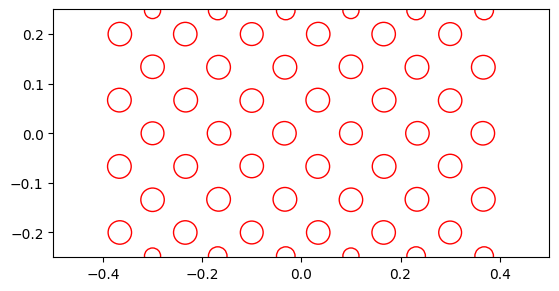

In [3]:
from scipy.spatial import ConvexHull

# 近似为圆，计算每个零水平集的质心和半径
circles = []
for level_set in zero_level_set:
    hull = ConvexHull(level_set)
    center = np.mean(level_set[hull.vertices], axis=0)
    radius = np.max(np.sqrt(np.sum((level_set[hull.vertices] - center) ** 2, axis=1)))
    circles.append((center[0], center[1], radius))
print("circles:", len(circles))

# 检查生成的圆
for circle in circles:
    print(f"Circle: Center=({circle[0].round(3)}, {circle[1].round(3)}), Radius={circle[2].round(3)}")

# 绘制近似的圆
plt.figure()
for circle in circles:
    circle_patch = plt.Circle((circle[0], circle[1]), circle[2], color='r', fill=False)
    plt.gca().add_patch(circle_patch)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.25, 0.25)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 基于 distmesh 生成非结构三角形网格

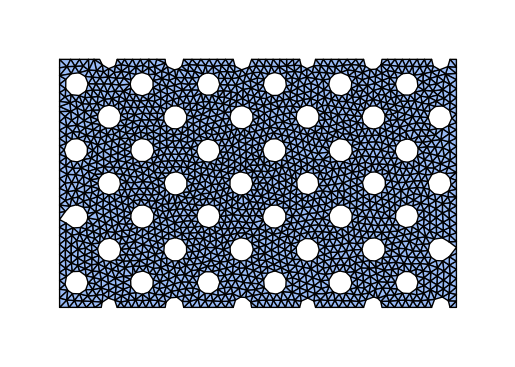

In [4]:
from domain_2d import BoxWithCircleHolesDomain

hmin = 0.0125
hmax = 0.1
domain = BoxWithCircleHolesDomain(box=domain, circles=circles, hmin=hmin, hmax=hmax)

maxiter = 100
mesh = TriangleMesh.from_domain_distmesh(domain, maxit=maxiter)

# 绘制生成的网格
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()